# YouTube API v3 Analysis: Channel Comparison & Playlist Insights

### -------------------------------------------------------------------------------------------------



- Compare 4 distinct YouTube channels using YouTube API v3.
- Uncover performance metrics: views, likes , comments, subscribers.
- Explore valuable insights from playlists and viewer engagement patterns.
- Empower data-driven content strategies for content creators and strategists.
- Visualize findings with interactive charts and graphs for easy comprehension.


### -------------------------------------------------------------------------------------------------

In [2]:
# Import Libraries
from googleapiclient.discovery import build
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
channel_ids = ['UCYO_jab_esuFRV4b17AJtAw', #3Blue1Brown
               'UC4a-Gbdw7vOaccHmFo40b9g', #Khan Academy
               'UCLLw7jmFsvfIVaUFsLs8mlQ', #Luke Barousse
               'UCvZnwzmc3m1Eush-Or8Z6DA', #UCvZnwzmc3m1Eush-Or8Z6DA
               ]


In [4]:
# YouTube API key
api_key = 'api_key'

# Build the YouTube API client
youtube = build('youtube', 'v3', developerKey=api_key)

## Function to get channel statistics

In [5]:
def get_channel_stats(youtube, channel_ids):
    all_data = []  # Initialize an empty list to store the channel statistics
    
    # Prepare the API request to get the channel information
    request = youtube.channels().list(
                part='snippet, contentDetails, statistics', 
                id=','.join(channel_ids))
    
    # Execute the API request and get the response
    response = request.execute()
    
    # Iterate through each channel in the response and extract relevant data
    for i in range(len(response['items'])):
        data = dict(
            Channel_name=response['items'][i]['snippet']['title'],
            Views=response['items'][i]['statistics']['viewCount'],
            Subscribers=response['items'][i]['statistics']['subscriberCount'],
            VideoCount=response['items'][i]['statistics']['videoCount'],      
            Playlist_id=response['items'][i]['contentDetails']['relatedPlaylists']['uploads']
        )
        all_data.append(data)  # Add the extracted data to the list
    
    return all_data


In [9]:
# toal number of rows
len(get_channel_stats(youtube, channel_ids))


4

In [10]:
# Create a YouTube Channel Statistics DataFrame
df = pd.DataFrame(channel_stats)

In [12]:
df.head()

,Channel_name,Views,Subscribers,VideoCount,Playlist_id
0,Luke Barousse,16774203,363000,137,UULLw7jmFsvfIVaUFsLs8mlQ
1,Khan Academy,2067905297,7940000,8384,UU4a-Gbdw7vOaccHmFo40b9g
2,Shashank Kalanithi,6073469,132000,152,UUvZnwzmc3m1Eush-Or8Z6DA
3,3Blue1Brown,350237327,5340000,132,UUYO_jab_esuFRV4b17AJtAw


In [13]:
#Datatypes
df.dtypes

Channel_name    object
Views           object
Subscribers     object
VideoCount      object
Playlist_id     object
dtype: object

In [21]:
df.columns

Index(['Channel_name', 'Views', 'Subscribers', 'VideoCount', 'Playlist_id'], dtype='object')

In [15]:
#Converting data types
df['Views'] = df['Views'].astype('int64')
df['Subscribers'] = df['Subscribers'].astype('int64')
df['VideoCount'] = df['VideoCount'].astype('int64')

df.dtypes

Channel_name    object
Views            int64
Subscribers      int64
VideoCount       int64
Playlist_id     object
dtype: object

# Barplots

In [34]:
def plot_subscribers_bar(data, Var): #Var could be  'Views', 'Subscribers'and 'VideoCount'. 
    # Set the figure size
    sns.set(rc={'figure.figsize': (6, 4)})

    # Create a bar plot for subscribers
    ax = sns.barplot(x='Channel_name', y='Subscribers', data=df)

    # Set plot title and labels
    plt.title('Total Number of {} for Each YouTube Channel'.format(Var))
    plt.xlabel('Channel Name')
    plt.ylabel('{}'.format(Var))

    # Display the plot
    plt.show()

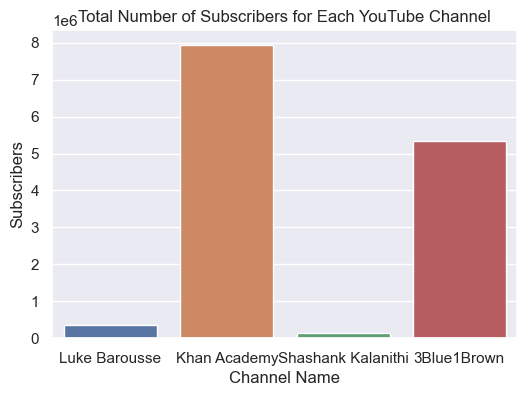

In [35]:
plot_subscribers_bar(df,'Subscribers' )

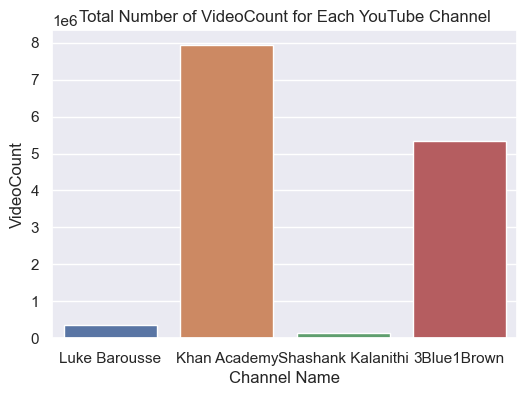

In [36]:
plot_subscribers_bar(df,'VideoCount' )

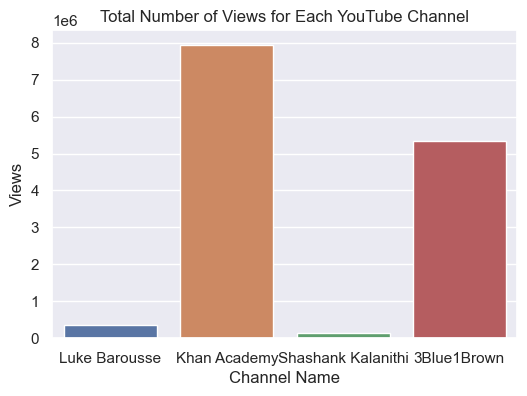

In [37]:
plot_subscribers_bar(df,'Views' )


#### Function to get more video ids

In [39]:
df

,Channel_name,Views,Subscribers,VideoCount,Playlist_id
0,Luke Barousse,16774203,363000,137,UULLw7jmFsvfIVaUFsLs8mlQ
1,Khan Academy,2067905297,7940000,8384,UU4a-Gbdw7vOaccHmFo40b9g
2,Shashank Kalanithi,6073469,132000,152,UUvZnwzmc3m1Eush-Or8Z6DA
3,3Blue1Brown,350237327,5340000,132,UUYO_jab_esuFRV4b17AJtAw


In [59]:
# Retrieve the playlist ID
Playlist_id = df[df['Channel_name'] == 'Khan Academy'].iloc[0, 4]
Playlist_id

'UU4a-Gbdw7vOaccHmFo40b9g'

In [64]:
def get_channel_ids(youtube, Playlist_id):
    """
    Retrieve all video IDs from a given YouTube playlist using the YouTube Data API v3.

    Parameters:
        youtube (googleapiclient.discovery.Resource): The initialized YouTube API client.
        Playlist_id (str): The ID of the YouTube playlist to fetch video IDs from.

    Returns:
        list: A list of video IDs from the specified YouTube playlist.
    """

    # Create a list to store the video IDs
    video_ids = []

    # Initial API request to fetch video IDs for the playlist
    request = youtube.playlistItems().list(
        part='contentDetails',
        playlistId=Playlist_id,
        maxResults=50
    )
    response = request.execute()

    # Extract video IDs from the API response
    for item in response['items']:
        video_ids.append(item['contentDetails']['videoId'])

    # Check if there are more pages of results
    next_page_token = response.get('nextPageToken')#if this item('nextPageToken')  present it will return the id otherwise None
    more_pages = True

    # Continue fetching video IDs for the playlist from other pages if available
    while more_pages: # We will move to the next page if there is next page other we do not 
        if next_page_token is None:
            more_pages = False
        else:
            # Request the next page of results
            request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId=Playlist_id,
                maxResults=50,
                pageToken=next_page_token
            )
            response = request.execute()

            # Extract video IDs from the new API response
            for item in response['items']:
                video_ids.append(item['contentDetails']['videoId'])

            next_page_token = response.get('nextPageToken')

    return video_ids

    

In [65]:
len(get_channel_ids(youtube, Playlist_id))

8385

In [66]:
video_ids = get_channel_ids(youtube, Playlist_id)

In [68]:
video_ids[:20]

['bSzW-0RuO9E',
 'hwK33GvGIK4',
 'GdwjpJwa8Ys',
 'xe6TO45kLL4',
 'VBEQgXLhBzU',
 'yTqhzgpt_9Y',
 'LbLmFy1rqVE',
 'S6Q474FnrSc',
 'DnB2qIMSN5w',
 'HjA-SvvL2BQ',
 'FMxCxD2CE8Y',
 'ejluWI1kFf4',
 'tielNKJivU8',
 'Elnfgd7OzoM',
 'ZgA8u9G9fFQ',
 'k-RTEIaYvAg',
 'n4YoZDQs6VA',
 'cnW_HDIBmz4',
 'ZhMEUikbVIk',
 'LKxOamnP8J4']

In [69]:
def get_channel_ids(youtube, video_ids):
    """
    Fetch video statistics for a list of YouTube video IDs using the YouTube Data API v3.

    Parameters:
        youtube (googleapiclient.discovery.Resource): The initialized YouTube API client.
        video_ids (list): A list of YouTube video IDs for which statistics will be fetched.

    Returns:
        list: A list of dictionaries containing video statistics, including title, published date,
              views count, likes count, and comment count for each video in the input list.
    """

    all_video_stats = []

    # Iterate through the video IDs in batches of 50 (YouTube API limit)
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part='snippet,statistics',
            id=','.join(video_ids[i:i + 50])
        )
        response = request.execute()

        # Extract video statistics for each video in the API response
        for video in response['items']:
            video_stats = dict(
                Title=video['snippet']['title'],
                Published_date=video['snippet'].get('publishedAt', 0),
                Views=video['statistics'].get('viewCount', 0),
                Likes=video['statistics'].get('likeCount', 0),
                Comment_count=video['statistics'].get('commentCount', 0)
            )
            all_video_stats.append(video_stats)

    return all_video_stats


In [70]:
len(get_channel_ids(youtube, video_ids))

8385

In [71]:
video_data = pd.DataFrame(get_channel_ids(youtube, video_ids))

In [72]:
video_data.head()

,Title,Published_date,Views,Likes,Comment_count
0,AI in Education: Opportunities + Pitfalls,2023-07-26T22:36:50Z,2013,27,3
1,Zero pairs worked example,2023-07-26T21:15:57Z,1757,17,2
2,Common percentages,2023-07-26T21:12:03Z,2970,84,8
3,Plotting inequalities on a number line,2023-07-26T20:21:56Z,1920,52,3
4,Adding negative numbers on a number line,2023-07-26T20:09:06Z,1163,42,3


In [73]:
video_data.dtypes

Title             object
Published_date    object
Views             object
Likes             object
Comment_count     object
dtype: object

In [74]:
video_data['Published_date'] = pd.to_datetime(video_data['Published_date'])
video_data['Views'] = video_data['Views'].astype('int64')
video_data['Likes'] = video_data['Likes'].astype('int64')
video_data['Comment_count'] = video_data['Comment_count'].astype('int64')
video_data.dtypes


Title                          object
Published_date    datetime64[ns, UTC]
Views                           int64
Likes                           int64
Comment_count                   int64
dtype: object

In [75]:
top_10_videos = video_data.sort_values(ascending=False, by = 'Views').head(10)
top_10_videos

,Title,Published_date,Views,Likes,Comment_count
943,You Can Learn Anything (30 sec),2019-11-27 17:42:51+00:00,10775459,137424,1735
4174,You Can Learn Anything,2014-08-19 16:42:53+00:00,7831214,111704,2374
4966,Elon Musk - CEO of Tesla Motors and SpaceX | E...,2013-04-22 23:40:53+00:00,6788183,77462,4234
6113,Introduction to limits | Limits | Differential...,2011-05-19 15:02:46+00:00,5523583,31727,1184
7261,Krebs / citric acid cycle | Cellular respirati...,2009-12-11 18:32:16+00:00,5205012,34348,1987
5887,Probability explained | Independent and depend...,2011-08-03 15:29:01+00:00,5154040,22060,1104
6270,Salman Khan TED Talk 2011 (from ted.com),2011-03-10 01:04:46+00:00,5046294,33683,2675
6081,Intro to vectors & scalars | One-dimensional m...,2011-06-11 20:27:41+00:00,4573554,18998,916
5890,"Elements and atoms | Atoms, compounds, and ion...",2011-08-01 02:06:03+00:00,3951160,12728,663
6297,Basic trigonometry | Basic trigonometry | Trig...,2011-02-15 17:27:29+00:00,3885858,17595,1027


Text(0.5, 1.0, 'top_10_videos')

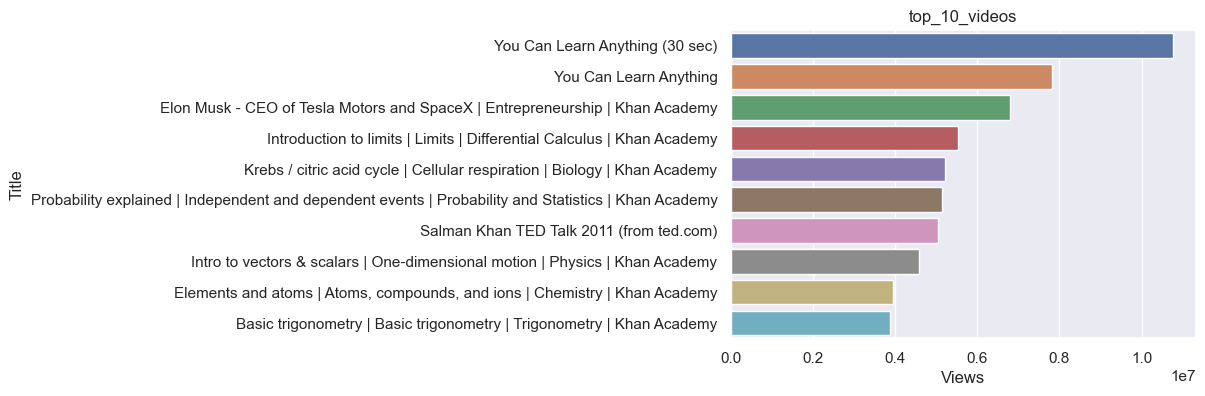

In [76]:
ax = sns.barplot(x = 'Views', y= 'Title', data = top_10_videos)
sns.set(rc = {'figure.figsize':(10,9)})
plt.title('top_10_videos')

In [77]:
video_data['month'] = video_data['Published_date'].dt.month
video_data['hour'] = video_data['Published_date'].dt.hour
video_data['year'] = video_data['Published_date'].dt.year

In [78]:
video_data.head()

,Title,Published_date,Views,Likes,Comment_count,month,hour,year
0,AI in Education: Opportunities + Pitfalls,2023-07-26 22:36:50+00:00,2013,27,3,7,22,2023
1,Zero pairs worked example,2023-07-26 21:15:57+00:00,1757,17,2,7,21,2023
2,Common percentages,2023-07-26 21:12:03+00:00,2970,84,8,7,21,2023
3,Plotting inequalities on a number line,2023-07-26 20:21:56+00:00,1920,52,3,7,20,2023
4,Adding negative numbers on a number line,2023-07-26 20:09:06+00:00,1163,42,3,7,20,2023


Text(0.5, 1.0, 'Top Years')

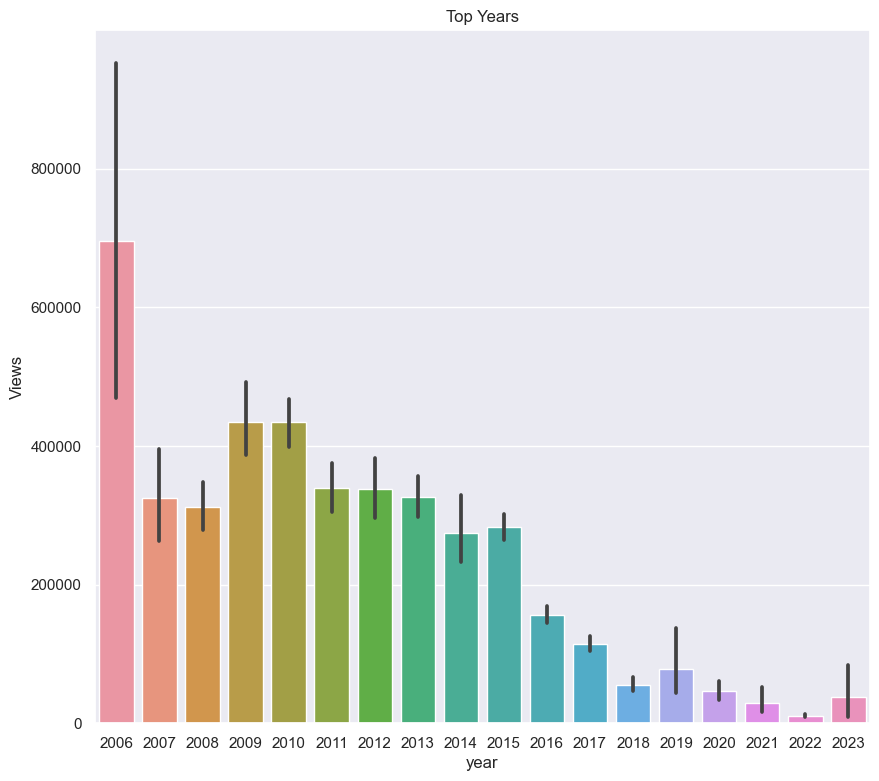

In [79]:
ax = sns.barplot(x = 'year', y= 'Views', data = video_data)
sns.set(rc = {'figure.figsize':(10,9)})
plt.title('Top Years')